# Quiz 1 - CS420 
## Md Rubaut Reshed Chowdhury

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from skimage import io
from skimage import filters
from skimage.io import imread, imsave
from PIL import Image, ImageChops, ImageFilter, ImageOps

In [3]:
im1 = Image.open('chestXray-dark.tif')
im1_x_cv = cv2.imread('chestXray-dark.tif',0)
im = Image.open('rubait.jpg')
im1_cv = cv2.imread('rubait.jpg',0)
im1_np = np.asarray(im1)
im1.save("chestXray-dark-jpg.jpg")

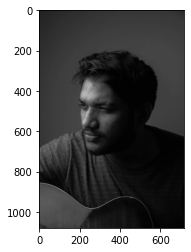

In [34]:
imgplot = plt.imshow(im, 'gray')

## Question 1 [10 points] <br>


#### Read an image of your choice where the  features  are barely vis­ible in the original image. Try enhancement techniques based on the following intensity transformations:  <br>
#### (a)* log. <br>
#### (b) gamma. <br>
#### (c) stretch. <br>
#### (d) Your specified transformation function. 

##### a) log

In [55]:
image = cv2.imread('rubait.jpg')
   
# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)

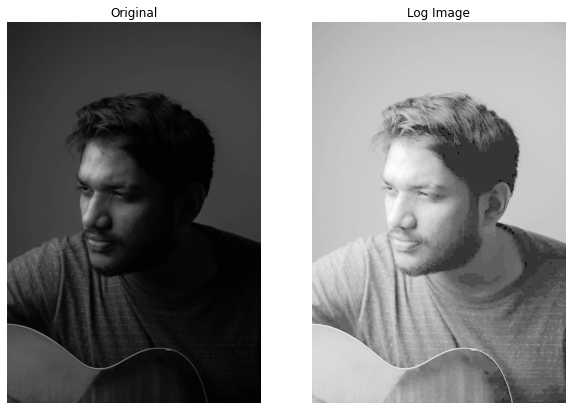

In [57]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(log_image, "gray")
plt.axis('off')
plt.title("Log Image");

##### b) gamma:

In [36]:
# import matplotlib.pyplot as plt 

gray_img = Image.open('rubait.jpg').convert("LA")
# gray_img.save("lenna_gray.png")

gamma_val = 0.88


def toGamma(gray_img, gamma_val):
    row = gray_img.size[0]
    col = gray_img.size[1]
    result_img1 = Image.new("L", (row, col))

    for x in range(1 , row):
        for y in range(1, col):
            value = pow(gray_img.getpixel((x,y))[0]/255,(1/gamma_val))*255
            if value >= 255 :
                value = 255
            result_img1.putpixel((x,y), int(value))
            # value = pow(gray_img.getpixel((x,y))[0]/255,(1/gamma2))*255
            # if value >= 255 :
            #     value = 255
            # result_img2.putpixel((x,y), int(value))
    # plt.imshow(result_img1, "gray")
    # plt.axis('off')
    # plt.title("Red")

    return result_img1
    # result_img1.show()



In [37]:
im1_g1 = toGamma(gray_img, 0.88)
im1_g2 = toGamma(gray_img, 3.88)
im1_g3 = toGamma(gray_img, 2.00)
im1_g4 = toGamma(gray_img, 1.5)

Text(0.5, 1.0, 'g=1.5')

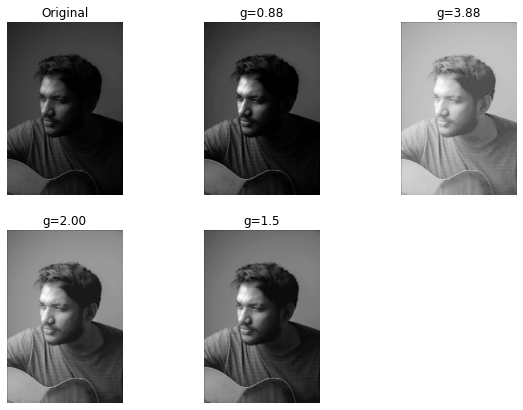

In [38]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 3
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(gray_img)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im1_g1, "gray")
plt.axis('off')
plt.title("g=0.88")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(im1_g2, "gray")
plt.axis('off')
plt.title("g=3.88")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(im1_g3,"gray")
plt.axis('off')
plt.title("g=2.00")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(im1_g4, "gray")
plt.axis('off')
plt.title("g=1.5");

g=2.00 seems to have done a great job (gamma>1)

##### c) stretch

##### The stretched image is saved as stretched_rubait.jpg

In [11]:
import cv2
import numpy as np

# Read the image
print(im1.shape)
# 418*602


(1080, 720)


In [ ]:
# Create zeros array to store the stretched image
minmax_img = np.zeros((im1.shape[0],im1.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        minmax_img[i,j] = 255*(im1[i,j]-np.min(im1))/(np.max(im1)-np.min(im1))
        # print(j, end=" ")
    print(i, end=" ")

In [13]:
# Display the stretched image
cv2.imshow('Minmax',minmax_img)
cv2.waitKey(0)

32

In [14]:
cv2.imwrite('stretched_rubait.jpg', minmax_img)

True

##### d) negative transformation

In [48]:
im_inv = ImageChops.invert(im)

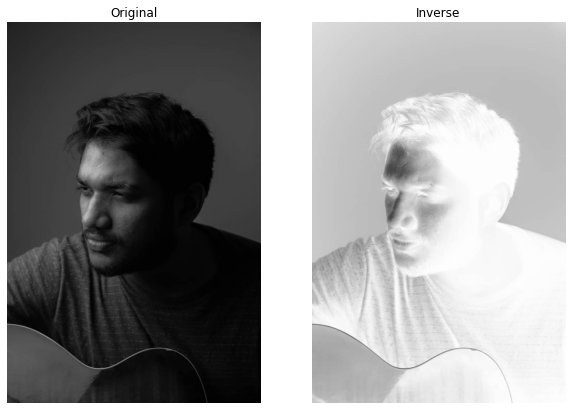

In [51]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im_inv, "gray")
plt.axis('off')
plt.title("Inverse");

### Question 2 [10 points] 
#### Read image chestXray-dark .tif and note that the ribs and other bone structures are not clearly visible.
#### (a) Enhance this image using histogram equalization function histeq.
#### (b) * Enhance the image by using functions imsharpen followed by histeq.The objective is to produce an image in which all the ribs and other bone structures are sharp and visible, and the gray level tonality is also enhanced.
#### (c) Reverse the processing order in (b) and discuss the reason(s) for any differences in the results in (b) and (c).

In [4]:
#equalizer
im1_e = cv2.equalizeHist(im1_x_cv)

In [8]:
#equalize to sharpen
im1_e = cv2.equalizeHist(im1_x_cv)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
im1_e_sh = cv2.filter2D(src=im1_e, ddepth=-1, kernel=kernel)


In [9]:
#sharpen to equalize

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
im1_sh = cv2.filter2D(src=im1_x_cv, ddepth=-1, kernel=kernel)


# img = cv2.imread('rubait.jpg',0)
im1_sh_e = cv2.equalizeHist(im1_sh)
# imgplot = plt.imshow(im1_sh_e, 'gray')


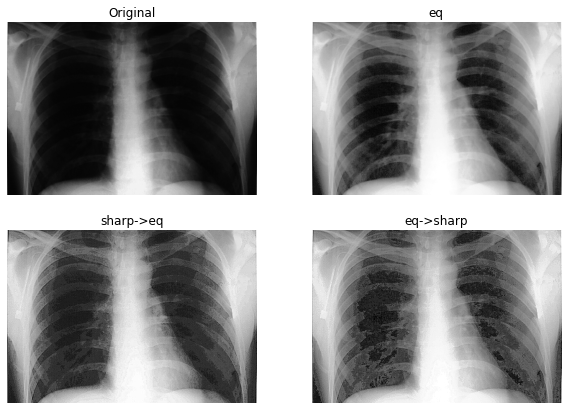

In [7]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im1_x_cv, "gray")
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im1_e, "gray")
plt.axis('off')
plt.title("eq")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(im1_sh_e, "gray")
plt.axis('off')
plt.title("sharp->eq")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(im1_e_sh,"gray")
plt.axis('off')
plt.title("eq->sharp");

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 5)
  
# # showing image
# plt.imshow(im1_g4, "gray")
# plt.axis('off')
# plt.title("g=1.5")

There is slight visible difference between doing sharp before eq and eq before sharp. <br>
It is because Histogram Equalization isn't Linear. 


#### Question 3 [10 points] 
### Read the image FigP0304(embedded_objects_noisy).tif and histogram-equalize it. You will note that the histogram-equal­ ized image reveals details not discernible in the original image.

In [20]:
#renamed Fig
im2 = Image.open('chess.tif')
im2_np = np.asarray(im2)


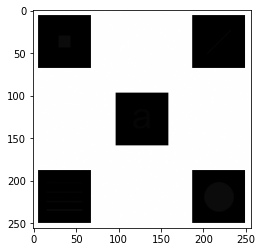

In [21]:
imgplot = plt.imshow(im2, 'gray')


In [22]:
# applying equalize method 
im2_eq = ImageOps.equalize(im2, mask = None)

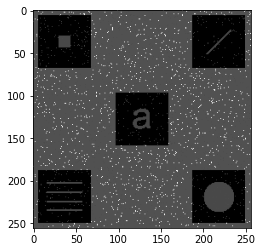

In [23]:
imgplot = plt.imshow(im2_eq, 'gray')


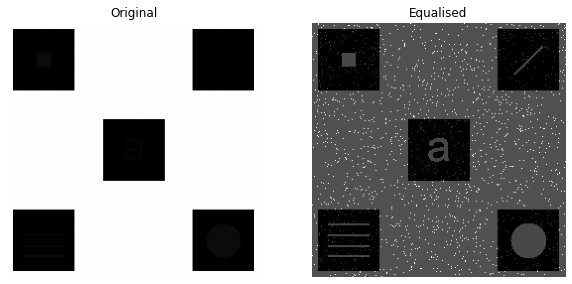

In [24]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im2, "gray")
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im2_eq, "gray")
plt.axis('off')
plt.title("Equalised");
